In [6]:
#importando a biblioteca pandas
import pandas as pd

In [7]:
#leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [8]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [10]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [11]:
#exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [12]:
#verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [13]:
#alterando o tipo de dado de cada coluna
df["LojaID"] = df["LojaID"].astype("object")

In [14]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [15]:
#consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [16]:
#substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean, inplace=True)

In [17]:
#substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [18]:
#apagando linhas com valores nulos
df.dropna(inplace=True)

In [19]:
#apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [20]:
#removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

In [21]:
#criando uma coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [22]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df["Receita"].max()

3544.0

In [23]:
#achar as maiores receitas
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [24]:
#achar as piores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [25]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [26]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [28]:
#verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [29]:
#transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [30]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [31]:
#agrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [32]:
#criandouma coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [33]:
df.head(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018


In [34]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
21,Natal,2019-02-08,679.00,853,2,1358.00,2019
182,Salvador,2019-01-02,6.60,1037,2,13.20,2019
52,Natal,2018-04-27,778.00,854,4,3112.00,2018
225,Salvador,2019-01-02,36.23,1035,1,36.23,2019
151,Salvador,2019-01-02,14.63,1035,1,14.63,2019


In [35]:
#extraindo o mês e o dia da venda
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [41]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
120,Aracaju,2018-01-01,7.73,1520,10,77.30,2018,1,1
192,Salvador,2019-01-02,166.51,1036,1,166.51,2019,1,2
228,Salvador,2019-01-02,6.87,1037,3,20.61,2019,1,2
100,Salvador,2019-01-01,190.97,1036,2,381.94,2019,1,1
58,Aracaju,2018-01-01,37.14,1520,7,259.98,2018,1,1
65,Natal,2019-04-05,292.00,852,2,584.00,2019,4,5
115,Recife,2019-03-02,12.23,981,3,36.69,2019,3,2
61,Aracaju,2018-01-01,39.80,1520,6,238.80,2018,1,1
99,Recife,2019-01-01,136.72,980,4,546.88,2019,1,1
145,Natal,2019-01-02,84.62,1034,2,169.24,2019,1,2


In [42]:
#criando coluna com trimestre
df["Trimestre_venda"] = df["Data"].dt.quarter

In [43]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,Trimestre_venda
58,Aracaju,2018-01-01,37.14,1520,7,259.98,2018,1,1,1
33,Salvador,2019-01-01,144.19,1035,2,288.38,2019,1,1,1
45,Natal,2019-03-11,431.00,852,3,1293.00,2019,3,11,1
118,Aracaju,2018-01-01,3.34,1522,1,3.34,2018,1,1,1
67,Natal,2019-02-14,379.00,852,2,758.00,2019,2,14,1


In [51]:
df.head(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,Trimestre_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,1


In [53]:
#filtrando as vendas de 2019 do mês de março
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [55]:
vendas_marco_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,Trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,1
...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,1


In [56]:
#total de vendas por loja
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

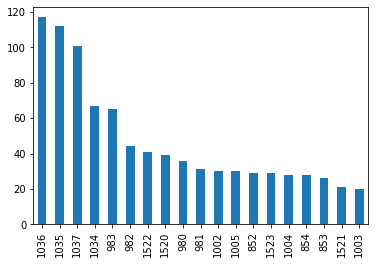

In [57]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

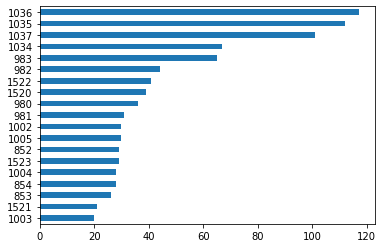

In [60]:
#grafico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

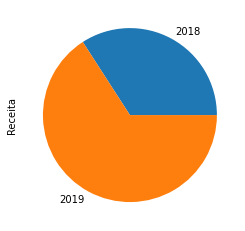

In [61]:
#grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [62]:
#total de vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

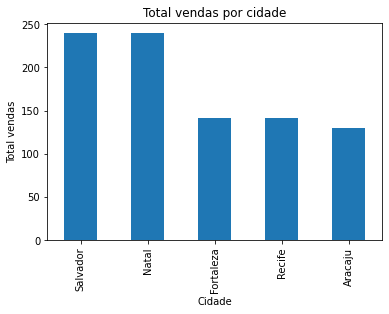

In [65]:
#adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

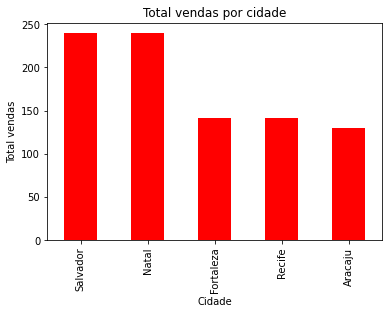

In [67]:
#alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

In [69]:
#alterando o estilo (link do site para escolher: https://matplotlib.org/stable/gallery/index.html#)
plt.style.use("ggplot")

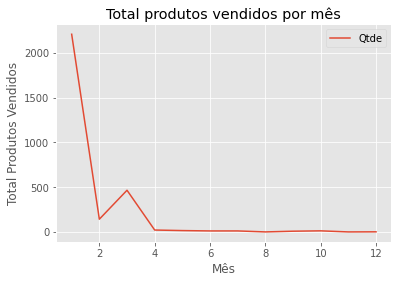

In [72]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [74]:
#selecionando as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

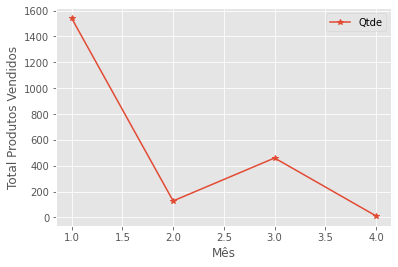

In [82]:
#total de produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "*")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

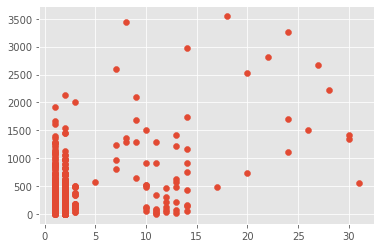

In [83]:
#grafico de dispersao
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"])

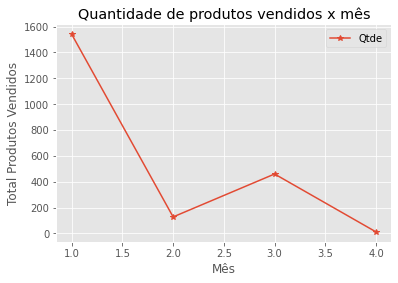

In [84]:
#salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "*")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("grafico QTDE x MES.png")